#### Import Libraries

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

# import standard libraries
import pandas as pd
import numpy as np

# import sklearn functions
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import functions.py
from functions import *

#### Loading, Cleansing & Standardisng the Data

In [2]:
original_data = pd.read_csv('.\data\world_university_rankings_2016.csv', index_col='university_name')
original_data.head()

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
university_name,,,,,,,,,,,,,
California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0


In [3]:
original_data.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
world_rank,800.000000,356.611250,193.900379,1.000000,200.750000,351.000000,526.000000,601.000000
teaching,800.000000,31.584000,14.985400,9.900000,21.000000,27.000000,37.500000,95.600000
international,800.000000,48.500375,23.690816,7.100000,29.450000,45.700000,65.450000,99.900000
research,800.000000,28.128625,19.532270,2.900000,14.350000,22.100000,35.525000,99.000000
citations,800.000000,51.309750,27.045440,1.200000,27.525000,50.300000,74.900000,100.000000
income,763.000000,46.869594,20.576165,28.000000,31.600000,38.600000,55.250000,100.000000
total_score,200.000000,62.520000,12.040555,48.800000,52.900000,57.950000,69.625000,95.200000
num_students,793.000000,24161.264817,22569.224842,462.000000,12331.000000,20174.000000,29700.000000,379231.000000
student_staff_ratio,793.000000,19.116393,12.522003,0.600000,12.300000,16.600000,22.400000,162.600000
international%,790.000000,12.702532,10.676075,0.000000,5.000000,10.000000,18.000000,82.000000


In [4]:
X = original_data[['teaching','international','research','citations','income','num_students','student_staff_ratio','international%','female%','male%']]

In [5]:
X = X.fillna(X.mean())

In [6]:
X.describe().T.style.background_gradient(cmap='pink_r')

,count,mean,std,min,25%,50%,75%,max
teaching,800.000000,31.584000,14.985400,9.900000,21.000000,27.000000,37.500000,95.600000
international,800.000000,48.500375,23.690816,7.100000,29.450000,45.700000,65.450000,99.900000
research,800.000000,28.128625,19.532270,2.900000,14.350000,22.100000,35.525000,99.000000
citations,800.000000,51.309750,27.045440,1.200000,27.525000,50.300000,74.900000,100.000000
income,800.000000,46.869594,20.094099,28.000000,31.800000,39.900000,53.700000,100.000000
num_students,800.000000,24161.264817,22470.143414,462.000000,12344.000000,20307.000000,29640.500000,379231.000000
student_staff_ratio,800.000000,19.116393,12.467030,0.600000,12.300000,16.850000,22.225000,162.600000
international%,800.000000,12.702532,10.609056,0.000000,5.000000,10.000000,18.000000,82.000000
female%,800.000000,49.538043,11.473152,1.000000,46.000000,51.000000,56.000000,100.000000
male%,800.000000,50.461957,11.473152,0.000000,44.000000,49.000000,54.000000,99.000000


In [7]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

#### Performing a K-means Clustering

In [8]:
# Create a k-means clustering model
kmeans = KMeans(init='k-means++', n_clusters= 3, n_init=10)

# Fit the data to the model
kmeans.fit(x_scaled)

# Determine which clusters each data point belongs to:
clusters = kmeans.predict(x_scaled)

In [9]:
# Add cluster number to the original data
x_clusered_data = pd.DataFrame(x_scaled,columns=X.columns,index=X.index)
x_clusered_data['cluster'] = clusters

x_clusered_data.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%,cluster
university_name,,,,,,,,,,,
California Institute of Technology,4.274564,0.654655,3.558974,1.794039,2.536181,-0.976050,-0.980509,1.348510,-1.442358,1.442358,2
University of Oxford,3.666926,1.938656,3.625572,1.757041,1.306195,-0.188914,-0.603279,2.008736,-0.308569,0.308569,2
Stanford University,4.067566,1.174169,3.487253,1.797739,0.818185,-0.381423,-0.908273,0.876919,-0.657427,0.657427,2
University of Cambridge,3.780441,1.816169,3.512867,1.690445,0.404870,-0.238210,-0.587226,2.008736,-0.308569,0.308569,2
Massachusetts Institute of Technology,3.860569,1.499393,3.097910,1.790340,2.416668,-0.582793,-0.811959,1.914418,-1.093500,1.093500,2


#### Selecting the number of clusters
Produce an elbow curve:

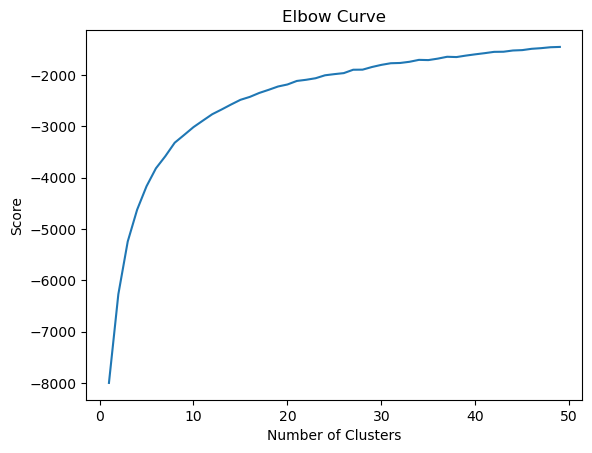

In [10]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(init='k-means++', n_clusters= i, n_init=10) for i in range(1,num_clusters)]
score = [kmeans_tests[i].fit(x_scaled).score(x_scaled) for i in range(len(kmeans_tests))]

# Plot Curve
plt.plot(range(1,num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Analysing the results

In [11]:
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(x_scaled)

# Transfor the scaled data to the new PCA space
x_reduced = pca.transform(x_scaled)

In [12]:
# Convert to a data frame
x_reduced_df = pd.DataFrame(x_reduced,index=X.index,columns=['PC1','PC2'])
x_reduced_df['cluster'] = clusters
x_reduced_df.head()

,PC1,PC2,cluster
university_name,,,
California Institute of Technology,5.555064,-3.811757,2
University of Oxford,5.977205,-1.462953,2
Stanford University,5.231170,-2.141250,2
University of Cambridge,5.735713,-1.242813,2
Massachusetts Institute of Technology,5.721362,-2.896713,2


Apply the same PCA transformation to the centroids:

In [14]:
centers_reduced = pca.transform(kmeans.cluster_centers_)

Display the data points and centroids (as crosses):

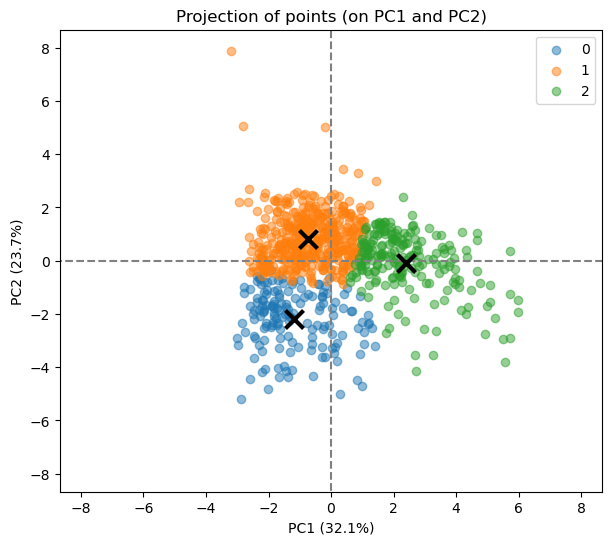

In [22]:
display_factorial_planes(x_reduced,2,pca,[(0,1)],illustrative_var=clusters,alpha=0.5)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

### Interpreting the Meaning of the Clusters
#### Parallel Coordinates Plot
Produce a parallel coordinates plot of all data points:

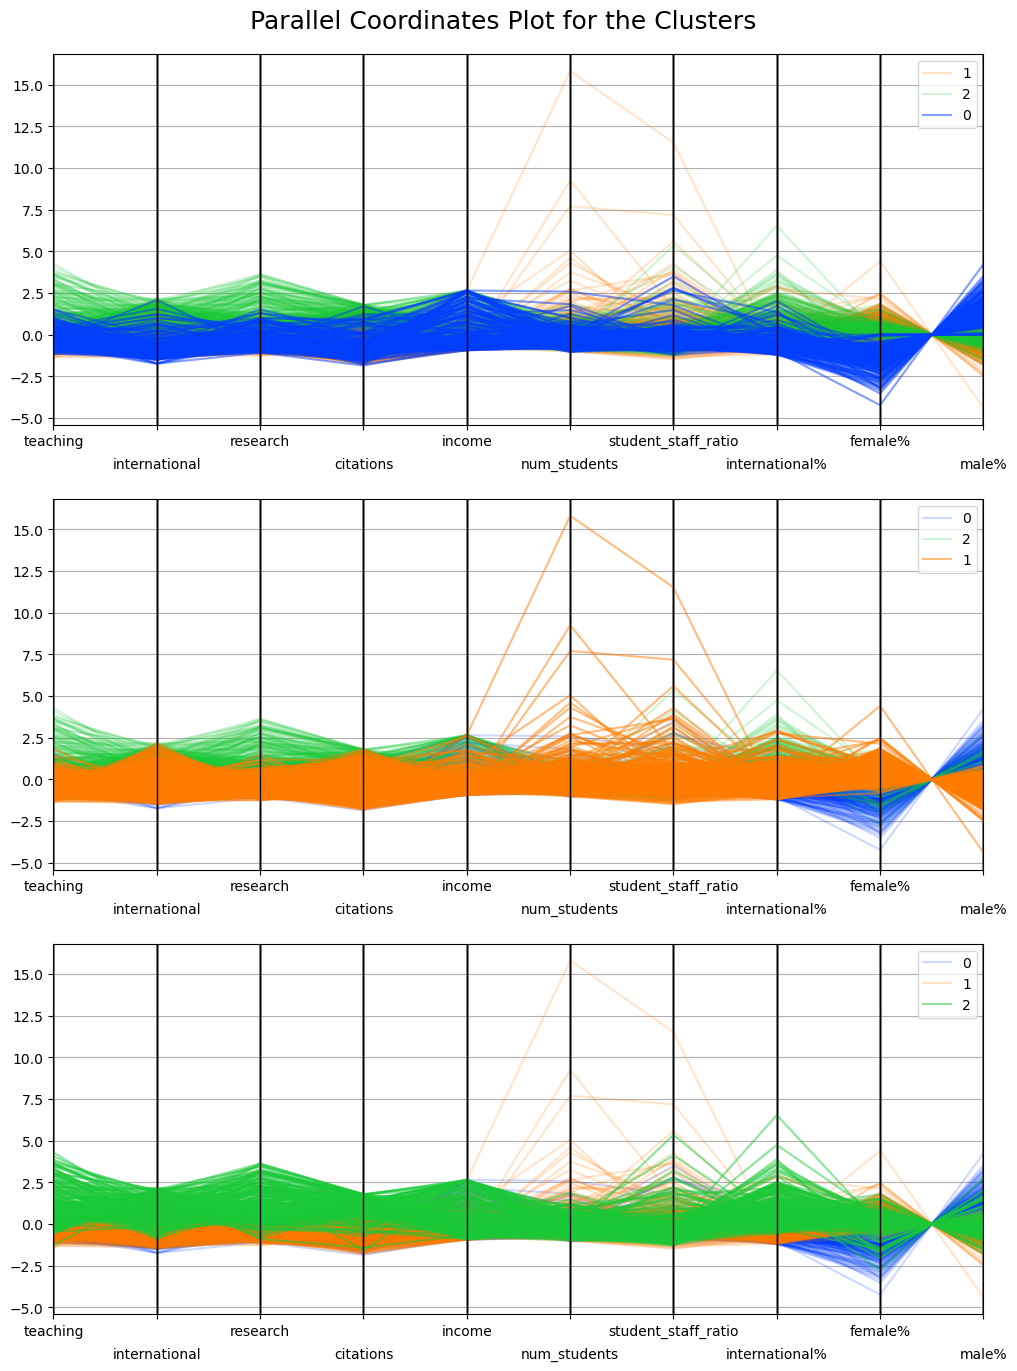

In [24]:
# Add the cluster number to the original scaled data
x_clustered = pd.DataFrame(x_scaled,index=X.index,columns=X.columns)
x_clustered['cluster'] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(x_clustered,3)

Produce a parallel coordinates plot of the centroids:

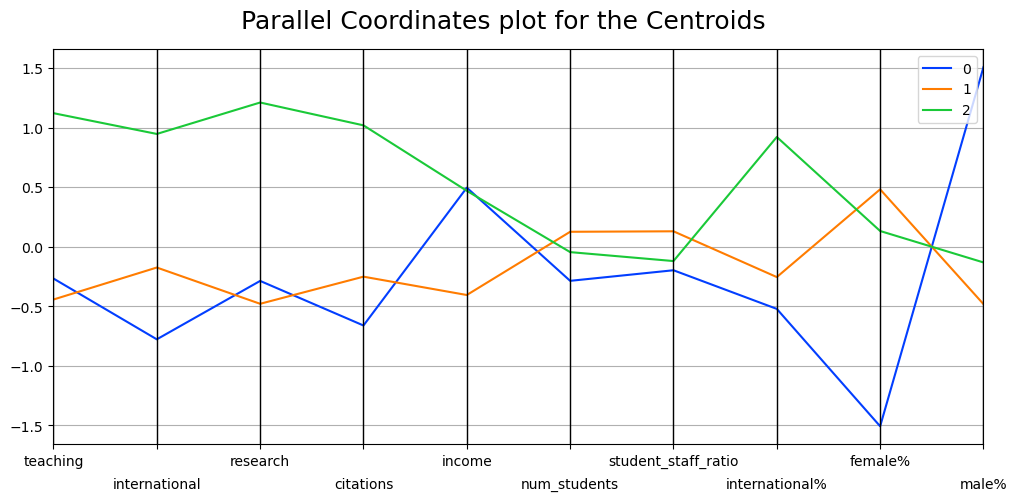

In [26]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids,10)